In [6]:
import matplotlib.pyplot as pt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import matplotlib as mpl
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression
mpl.rcParams['figure.figsize'] = (18, 6)
mpl.rcParams['axes.grid'] = True

In [7]:
#dataset preparation with lag
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [8]:
def sense_val_inflow(x):
        if(x <= 500):
            return 1
        elif((x > 500) and (x<=1000)):
            return 2
        elif((x > 1000) and (x<=2500)):
            return 5
        elif((x > 2500) and (x<=5000)):
            return 6
        elif((x > 5000) and (x <= 7000)):
            return 7
        elif((x > 7000) and (x <= 11000)):
            return 8
        elif((x > 11000) and (x <= 22000)):
            return 9
        elif(x > 22000):
            return 13   

In [19]:
class LocallyWeightedRegression:
    def __init__(self,X,y):
        self.train_x = X
        self.train_y = y

    def fit(self, train_x, train_y):
        LocallyWeightedRegression(train_x,train_y)
        
        
    #locally weighted regression
    
    def lwr1(self,x0, inp, out, k):
        m,n = np.shape(inp)
        ypred = np.zeros(m)    
        ypred = x0 * self.beta(x0, inp, out, k)
        #print("The final prediction is :",ypred)
        return ypred

    def beta(self, point, inp, out, k):
        wt = self.kernal(point, inp, k)
        #print("The weight of betas is",wt)
        #print("Weight * inp" , (inp.T * (wt*inp)).I)
        out = out.reshape((inp.shape[0],1))
    #     print(inp.shape)
    #     print(wt.shape)
    #     print(out.shape)
        beta_val = (inp.T * (wt*inp)).I * inp.T * wt * out
        #print("The weight is beta value is",beta_val)
        return beta_val

    def kernal(self, point, inp, k):
        l,b = np.shape(inp)
        weights = np.mat(np.eye((l)))
        #print(weights)    
        for i in range(l):
            #point = point.reshape((point.shape[0],1))
            #print(point.shape,inp[i].shape)
            diff = point - inp[i]
            #print(diff.shape)
            weights[i,i] = np.exp(np.dot(diff,diff.T) / (-2.0 * (k**2)))
        return weights   
    
    def call_Lwr(self, test_x,train_x,train_y,k):
        ypred = []
        for i in test_x:
            ypred.append(self.lwr1(i, train_x, train_y, k))
        ypred = np.array(ypred).reshape(test_y.shape[0],1)
        ypred = np.round(ypred)
        return ypred

        

    def predict(self, test_x):
        return self.call_Lwr(test_x,train_x,train_y,k=120)  

            MADIKERI  SOMWARPET   VIRAJPET  Inflow_Label
Dates                                                   
2011-01-01    0.0000   0.000000   0.000000             1
2011-01-02    0.0000   0.000000   0.000000             1
2011-01-03    0.0000   0.000000   0.000000             1
2011-01-04    0.0000   0.000000   0.000000             1
2011-01-05    0.0000   0.000000   0.000000             1
...              ...        ...        ...           ...
2014-09-08    6.4200   5.761667   1.450000             8
2014-09-09   18.4225   4.771667   7.920000             7
2016-09-25   16.1650   9.836667   4.008333             7
2017-09-01    5.9775   0.595000   0.903333             7
2017-09-20   33.0275  20.313333  25.176667             7

[364 rows x 4 columns]


/home/ganesh/PycharmProjects/untitled1/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This is Logistic Regression
F1 Score =  0.7853183893312384
Precision =  0.7925038296789418
Recall =  0.8071625344352618


/home/ganesh/PycharmProjects/untitled1/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


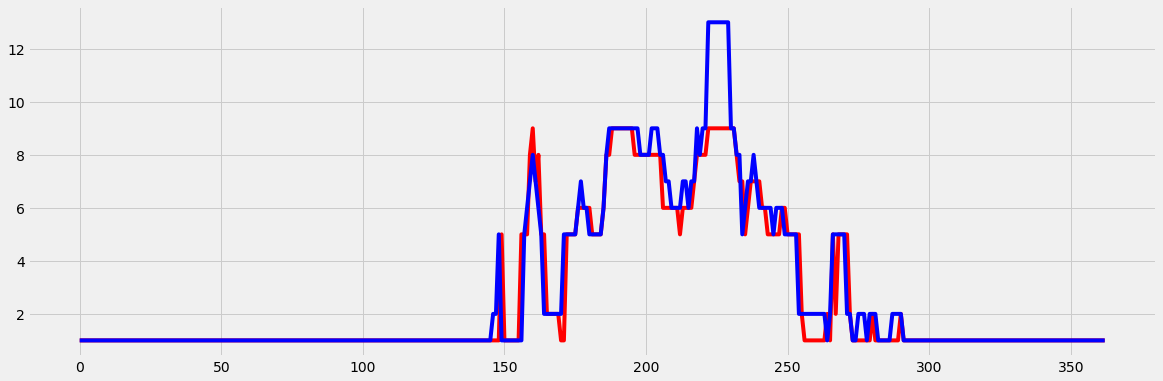

This is LWR


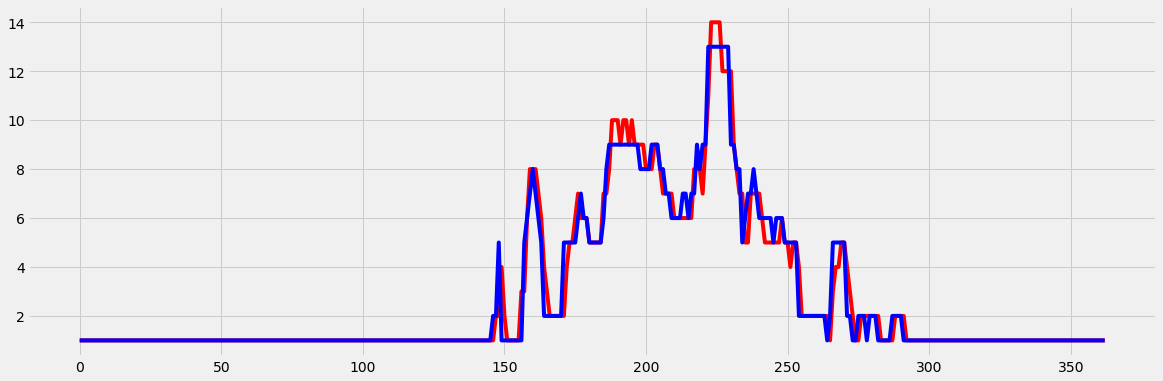

Accuracy =  0.8016528925619835
F1 Score =  0.8205371817781375
Precision =  0.8477667715737564
Recall =  0.8016528925619835
F1 Score_no_lag =  0.8205371817781375


/home/ganesh/PycharmProjects/untitled1/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# #df = pd.read_csv('allYearLabeledHarangi.csv')
# df = pd.read_csv('allYearLabeledHarangi.csv')
# df['month'] = pd.DatetimeIndex(df['Dates']).month
# df['year'] = pd.DatetimeIndex(df['Dates']).year
# df = df.loc[(df['year'] <= 2017) & (df['month'] <= 12)]
# df.drop(['Label'],axis = 1,inplace = True)
# df.set_index('Dates',inplace = True)    
# dataframe = pd.DataFrame(df, columns = ['MADIKERI', 'SOMWARPET', 'VIRAJPET'])
# dataframe["minimum"] = dataframe.min(axis = 1)
# df.drop(['month','year',"Present Storage(TMC)",'Reservoir Level(TMC)','Outflow'],axis = 1,inplace = True)
# df['Inflow_Label'] = sense_val_inflow(df)
# df.drop(['Inflow'],axis = 1,inplace = True)
# df

#Initialize lag value

lag_val = 2

#df['Inflow_Label'] = sense_val_inflow(df)
df = pd.read_csv('allYearLabeledHarangi.csv')
df['month'] = pd.DatetimeIndex(df['Dates']).month
df['year'] = pd.DatetimeIndex(df['Dates']).year
df = df.sort_values(by = ['month','Dates'])
df = df.loc[(df['year'] <= 2017) & (df['month'] <= 12)]
df.drop(['month','year',"Present Storage(TMC)",'Reservoir Level(TMC)','Outflow'],axis = 1,inplace = True)
df.set_index('Dates',inplace = True)
df['Inflow_Label'] = df['Inflow'].apply(sense_val_inflow)
df.drop(['Inflow','Label'],axis = 1,inplace = True)
initial = 0
uptill = 50
common_diff = 50
for k in range(1):
    df12 = pd.DataFrame()
    for i in range(6):
        df1 = df[df['Inflow_Label'] == i+1]
        df12 = df12.append(df1.iloc[initial:uptill])
    df12 = df12.append(df[df['Inflow_Label'] > 6])
    #df12.Inflow_Label.value_counts()
    print(df12)
    initial = initial+ common_diff
    uptill =  uptill + common_diff
    # Series to Supervised Train dataset

    values = df.values
    values = values.astype('float64')
    reframed = series_to_supervised(values, lag_val,1)#lag of 4 days
    reframed.drop(reframed.columns[[]], axis=1, inplace=True)
    reframed

    # Creating train_x and train_y

    values = reframed.values
    train_x = values[:,:-1]
    train_y = values[:,-1].astype(int)
    train_y = train_y.reshape((train_x.shape[0],1))
#     print(train_x.shape)
#     print(train_y.shape)
    train_x.shape
    inp = values
    train_x
    train_y


    # Test Dataframe

    df1 = pd.read_csv('allYearLabeledHarangi.csv')
    df1['month'] = pd.DatetimeIndex(df1['Dates']).month
    df1['year'] = pd.DatetimeIndex(df1['Dates']).year
    df1 = df1.loc[(df1['year'] > 2017) & (df1['month'] <= 12)]
    df1.drop(['Label'],axis = 1,inplace = True)
    df1.set_index('Dates',inplace = True)    
    dataframe = pd.DataFrame(df1, columns = ['MADIKERI', 'SOMWARPET', 'VIRAJPET'])
    dataframe["minimum"] = dataframe.min(axis = 1)
    df1.drop(['month','year',"Present Storage(TMC)",'Reservoir Level(TMC)','Outflow'],axis = 1,inplace = True)
    df1['Inflow_Label'] = df1['Inflow'].apply(sense_val_inflow)
    df1.drop(['Inflow'],axis = 1,inplace = True)

    # Series to supervised Test Dataset

    values1 = df1.values
    values1 = values1.astype('float64')
    reframed1 = series_to_supervised(values1, lag_val, 1)#lag of 4 days
    reframed1.head()
    reframed1.drop(reframed1.columns[[]], axis=1, inplace=True)
    reframed1

    # Creating test_x and test_y

    values1 = reframed1.values
#     print(values1)
#     print(values1)
    test_y = values1[:,-1].astype(int)
    test_x = values1[:,:-1]
    test_y = test_y.reshape(test_x.shape[0],1) 
#     print(train_x.shape,train_y.shape)
#     print(test_x.shape)
#     print(test_y.shape)
    Q_point = values1
    Q_point
    values
    
    #Logistic Regression 
    
    lr = LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=10000)
    lr.fit(train_x,train_y)
    ypred = lr.predict(test_x)
    Actuall_inflow=test_y.reshape(test_y.shape[0],1)
    print("This is Logistic Regression")
    print("F1 Score = ",metrics.f1_score(Actuall_inflow[:],ypred[:],average = 'weighted'))
    print("Precision = ",metrics.precision_score(Actuall_inflow[:],ypred[:],average = 'weighted'))
    print("Recall = ",metrics.recall_score(Actuall_inflow[:],ypred[:],average = 'weighted'))
    pt.plot(ypred[:],c='red')
    pt.plot(Actuall_inflow[:],c='blue')
    pt.pause(0.05)
    
    # LWR Class Prediction
    
    lwr = LocallyWeightedRegression(train_x,train_y)
    lwr.fit(train_x,train_y)
    ypred = lwr.predict(test_x)
    ypred = np.round(ypred)
    Actuall_inflow=test_y.reshape(test_y.shape[0],1)
    df3 = pd.DataFrame()
    print("This is LWR")
    df3['predicted'] = list(ypred)
    df3['Actuall'] = Actuall_inflow
    df3.to_csv(r"/home/ganesh/Downloads/choice_added_pred.csv")
    pt.plot(ypred[:],c='red')
    pt.plot(Actuall_inflow[:],c='blue')
    pt.pause(0.05)
    print("Accuracy = " ,metrics.accuracy_score(Actuall_inflow,ypred))
    print("F1 Score = ",metrics.f1_score(Actuall_inflow[:],ypred[:],average = 'weighted'))
    print("Precision = ",metrics.precision_score(Actuall_inflow[:],ypred[:],average = 'weighted'))
    print("Recall = ",metrics.recall_score(Actuall_inflow[:],ypred[:],average = 'weighted'))
    print("F1 Score_no_lag = ",metrics.f1_score(Actuall_inflow,ypred,average = 'weighted'))
    
    
    # Ensemble_appending
    
# eclf = VotingClassifier(estimators=estimators, voting='soft')
# eclf = eclf.fit(train_x,train_y)
# ypred = eclf.predict(test_x)

# estimators
    